In [1]:
# climate_analysis.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. LOAD DATASET
df = pd.read_csv('climate_action_data.csv')

In [3]:
# 2. INITIAL INSPECTION
print("\n--- DATA INFO ---")
print(df.info())
print("\n--- FIRST FIVE ROWS ---")
print(df.head())
print("\n--- MISSING VALUES PER COLUMN ---")
print(df.isnull().sum())
print("\n--- DESCRIPTIVE STATISTICS ---")
print(df.describe())


--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB
None

--- FIRST FIVE ROWS ---
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025

In [16]:
# 3. DATA CLEANING (Final, future-proof)

# Replace 'error' strings with NaN
df.replace('error', np.nan, inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert columns to numeric where possible, handling errors safely
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except (ValueError, TypeError):
        pass  # Skip columns that cannot be converted

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with missing essential environmental readings
essential_cols = ['soil_moisture', 'temperature', 'humidity']
existing_essentials = [col for col in essential_cols if col in df.columns]
df.dropna(subset=existing_essentials, inplace=True)

# Fill remaining missing values using forward fill (safe syntax)
df.ffill(inplace=True)
# ✅ Show the cleaned data structure and stats
print("\n--- Cleaned Data Info ---")
print(df.info())

print("\n--- Any Remaining Missing Values? ---")
print(df.isnull().sum())

print("\n--- First Few Cleaned Rows ---")
print(df.head())





--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sensor_id                      802 non-null    object 
 1   date                           802 non-null    object 
 2   soil_moisture(%)               802 non-null    float64
 3   soil_ph                        802 non-null    float64
 4   temperature(c)                 802 non-null    float64
 5   humidity(%)                    802 non-null    float64
 6   crop_type                      802 non-null    object 
 7   fertilizer_recommended(kg/ha)  802 non-null    float64
 8   irrigation_recommended(mm)     802 non-null    float64
 9   drone_image_id                 802 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.9+ KB
None

--- Any Remaining Missing Values? ---
sensor_id                        0
date                 

In [5]:
# 4. EXPLORATORY DATA ANALYSIS

# Descriptive statistics
print("\n--- CLEANED DATA STATISTICS ---")
print(df.describe())



--- CLEANED DATA STATISTICS ---
       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        797.000000  797.000000      797.000000   797.000000   
mean          44.763726    6.248795       26.460602    60.037265   
std           20.524828    1.024776        4.878540    17.470601   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.930000    5.320000       22.300000    45.900000   
50%           45.410000    6.260000       26.600000    59.600000   
75%           62.670000    7.080000       30.600000    75.300000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     797.000000                  797.000000  
mean                       87.468005                   17.392221  
std                        34.874392                    7.162517  
min                        30.000000                    5.000000  
25%                

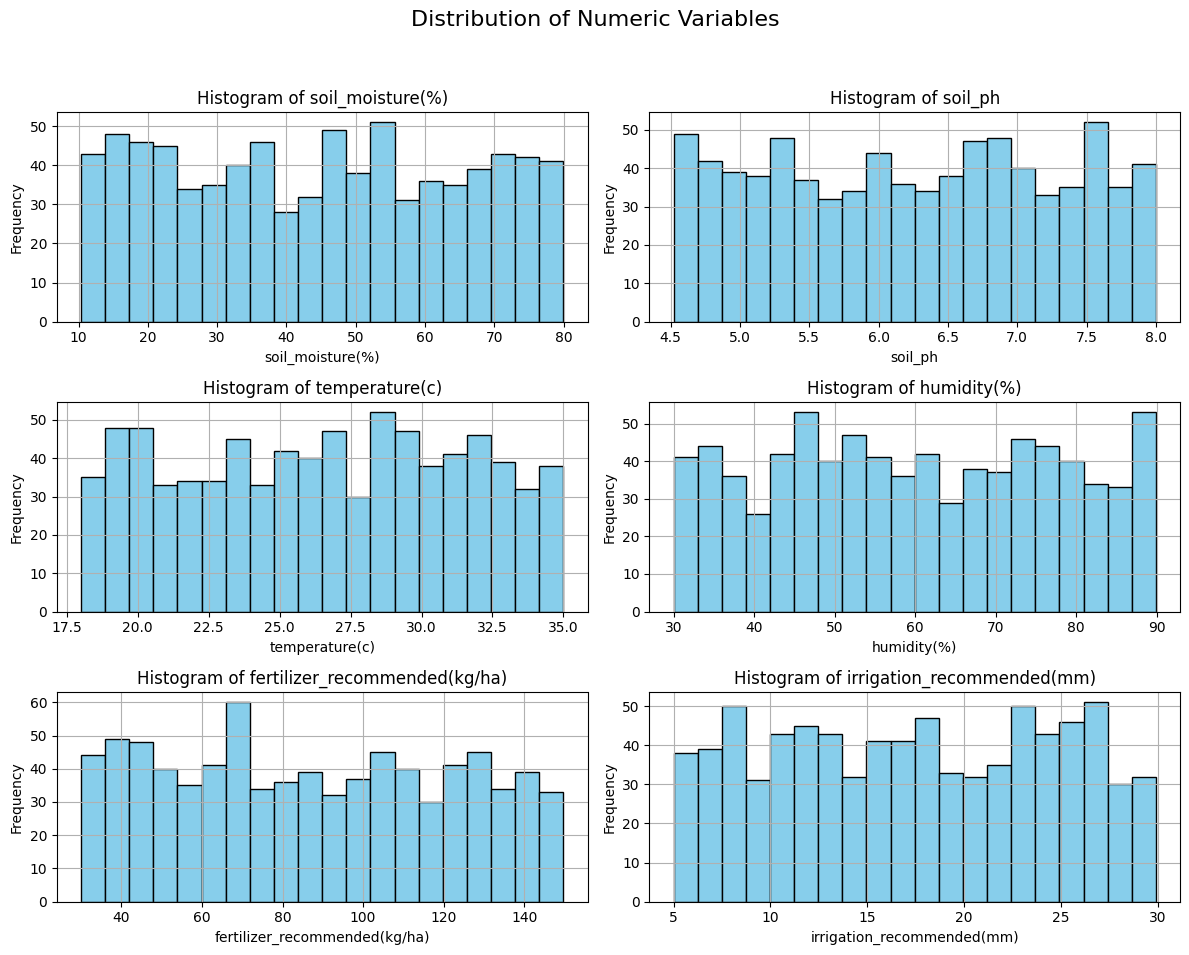

In [23]:
import matplotlib.pyplot as plt

# Create histograms for all numeric columns
axes = df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')

# Set axis labels for each subplot
for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())  # X-axis shows the variable name
    ax.set_ylabel("Frequency")     # Y-axis shows frequency
    ax.set_title(f"Histogram of {ax.get_title()}")  # Enhance the title

# Main title and layout
plt.suptitle("Distribution of Numeric Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()


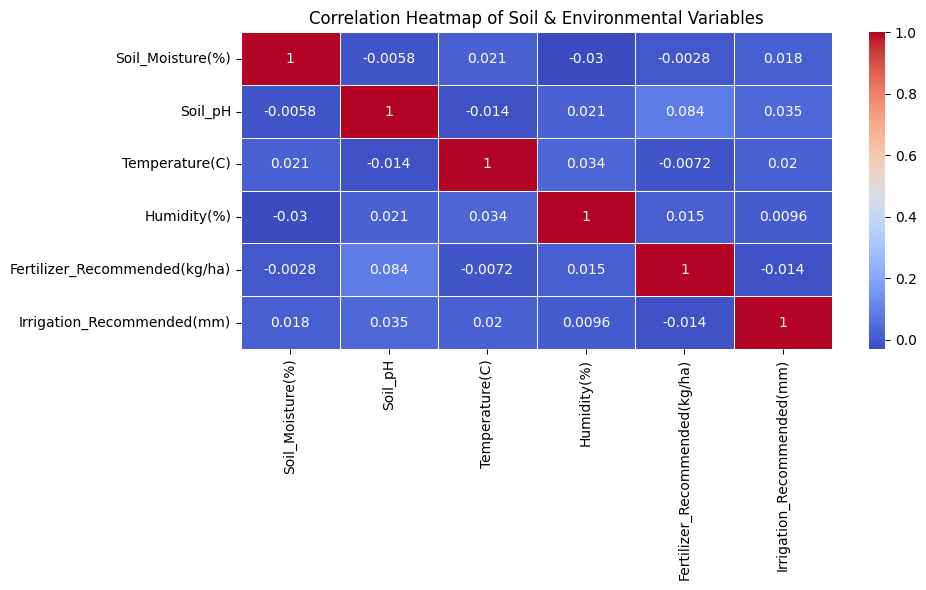

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Soil & Environmental Variables')
plt.tight_layout()
plt.show()


In [ ]:
## Check if required columns exist
if 'crop_type' in df.columns and 'soil_moisture' in df.columns:
    moisture_by_crop = df.groupby('crop_type')['soil_moisture'].mean().sort_values(ascending=False)
    
    print("\n--- CROP WITH HIGHEST AVERAGE SOIL MOISTURE ---")
    print(moisture_by_crop.head(1))  # Print only the top crop
else:
    print("\n⚠️ Required columns 'crop_type' and/or 'soil_moisture' not found in the dataset.")



⚠️ Required columns 'crop_type' and/or 'soil_moisture' not found in the dataset.


In [25]:
import pandas as pd

# Load the data (assuming the CSV is named 'climate_action_data.csv')
df = pd.read_csv('climate_action_data.csv')

# Clean data: Remove rows with errors or missing crop types
df = df[df['Soil_Moisture(%)'] != 'error']
df = df.dropna(subset=['Crop_Type'])

# Convert soil moisture to numeric (in case some values were read as strings)
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'])

# Calculate average soil moisture by crop type
moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)

print("\n--- CROP WITH HIGHEST AVERAGE SOIL MOISTURE ---")
print(moisture_by_crop.head(1))


--- CROP WITH HIGHEST AVERAGE SOIL MOISTURE ---
Crop_Type
Wheat    46.732772
Name: Soil_Moisture(%), dtype: float64


In [26]:
# Crops with average temperatures > 30°C

# First ensure temperature is numeric and clean data
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')  # Convert to numeric, invalid parsing becomes NaN
df_clean = df.dropna(subset=['Temperature(C)', 'Crop_Type'])  # Remove rows with missing temp or crop type

# Get crops with average temp > 30°C
hot_crops = df_clean[df_clean['Temperature(C)'] > 30].groupby('Crop_Type')['Temperature(C)'].mean()

print("\n--- CROPS REQUIRING IRRIGATION ADJUSTMENTS (>30°C) ---")
print(hot_crops.sort_values(ascending=False))
print("\nRecommendation: Increase irrigation for these heat-sensitive crops.")


--- CROPS REQUIRING IRRIGATION ADJUSTMENTS (>30°C) ---
Crop_Type
Wheat       32.621951
Lettuce     32.554762
Maize       32.485714
Beans       32.390323
Tomatoes    32.379167
Name: Temperature(C), dtype: float64

Recommendation: Increase irrigation for these heat-sensitive crops.


In [11]:
# 6. EXPORT CLEANED DATASET
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("\n✅ Cleaned dataset exported as 'cleaned_precision_agriculture_data.csv'.")



✅ Cleaned dataset exported as 'cleaned_precision_agriculture_data.csv'.
